# Employee Attrition and Turnover Prediction

Project by:<br> Henil Jain <br>
            Pujan Kothari<br>
            Jainam Shah<br>

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### Reading CSV

In [2]:
df = pd.read_csv("employee.csv")
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## Data Preprocessing


No null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.shape

(1470, 35)

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:

df.Age.unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [8]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [10]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Drawing Graphs to compare and learn more about the data

[Text(0.5, 1.0, 'Age Vs Attrition')]

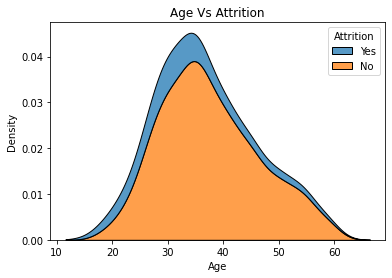

In [12]:
sns.kdeplot(data=df, x="Age", hue="Attrition", multiple="stack").set(title='Age Vs Attrition')


[Text(0.5, 1.0, 'DistanceFromHome Vs Attrition')]

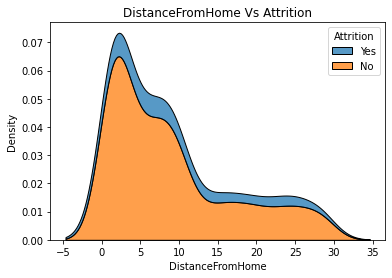

In [13]:
sns.kdeplot(data=df, x="DistanceFromHome", hue="Attrition", multiple="stack").set(title='DistanceFromHome Vs Attrition')

[Text(0.5, 1.0, 'WorkLifeBalance Vs Attrition')]

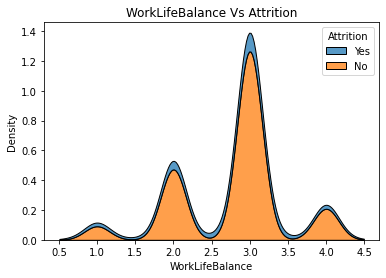

In [14]:
sns.kdeplot(data=df, x="WorkLifeBalance", hue="Attrition", multiple="stack").set(title='WorkLifeBalance Vs Attrition')

[Text(0.5, 1.0, 'Education Vs Attrition')]

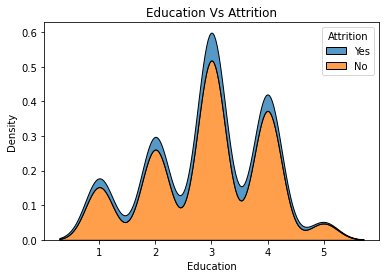

In [15]:
sns.kdeplot(data=df, x="Education", hue="Attrition", multiple="stack").set(title='Education Vs Attrition')

[Text(0.5, 1.0, 'JobSatisfaction Vs Attrition')]

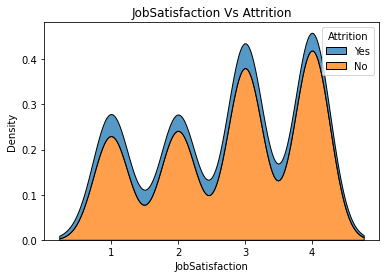

In [16]:
sns.kdeplot(data=df, x="JobSatisfaction", hue="Attrition", multiple="stack").set(title='JobSatisfaction Vs Attrition')

[Text(0.5, 1.0, 'TotalWorkingYears Vs Attrition')]

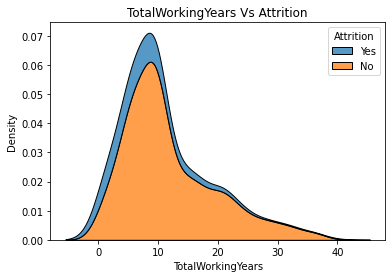

In [17]:
sns.kdeplot(data=df, x="TotalWorkingYears", hue="Attrition", multiple="stack").set(title='TotalWorkingYears Vs Attrition')

[Text(0.5, 1.0, 'MonthlyIncome Vs Attrition')]

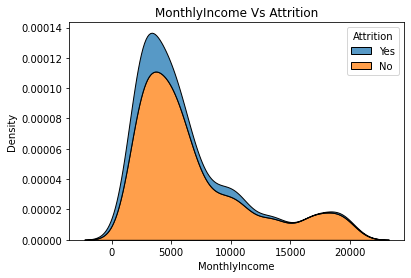

In [18]:
sns.kdeplot(data=df, x="MonthlyIncome", hue="Attrition", multiple="stack").set(title='MonthlyIncome Vs Attrition')

<AxesSubplot:xlabel='Age', ylabel='Density'>

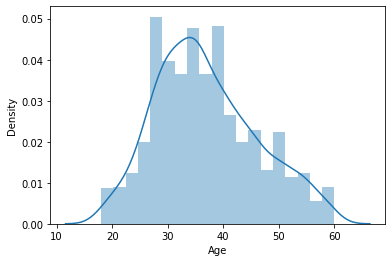

In [19]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

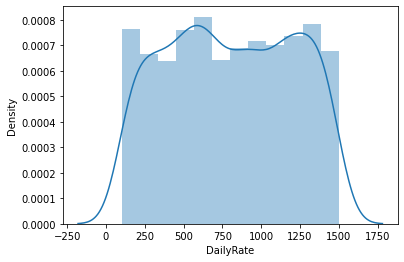

In [20]:
sns.distplot(df.DailyRate)

## Checking for Outliers in numeric columns

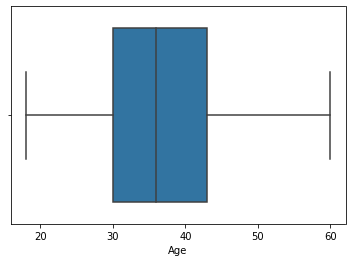

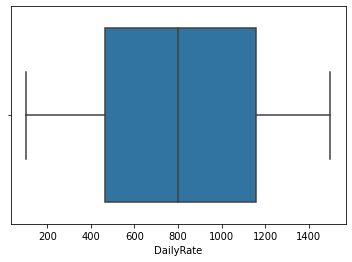

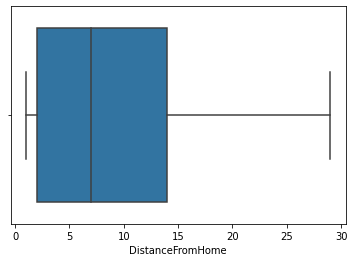

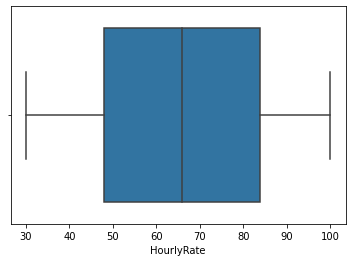

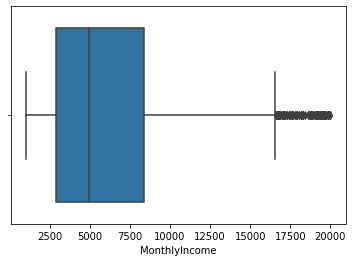

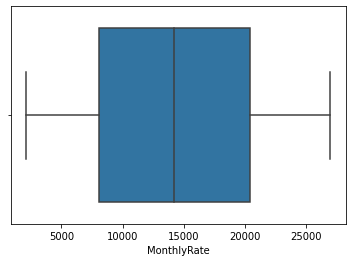

In [21]:

lst = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate']
for i in lst:
    sns.boxplot(df[i])
    plt.show()

In [22]:
Q1 = np.quantile(df.MonthlyIncome, [0.25])
Q3 = np.quantile(df.MonthlyIncome, [0.75])
IQR = Q3 - Q1
df[df.MonthlyIncome>16581].shape

(114, 35)

## Monthly income column contains outliers


Applying log to monthly income

<AxesSubplot:xlabel='MonthlyIncome'>

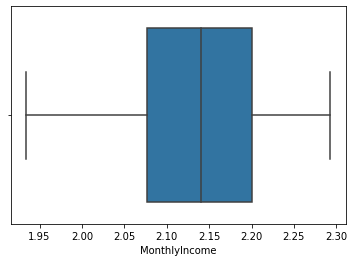

In [23]:
df['MonthlyIncome'] = np.log(df['MonthlyIncome'])
sns.boxplot(np.log(df['MonthlyIncome']))

## Dropping Zero Variance Predictors


In [24]:
df.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [25]:
df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [26]:
df.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

#### Dropping these columns

In [27]:
df.drop(columns = ['EmployeeCount','EmployeeNumber','Over18','StandardHours'] , inplace = True)

# Feature Engineering

##### Making Bins

In [28]:
df['Age_bins'] = pd.qcut(df.Age, [0,0.25,0.50,0.75,1.0], labels= ['Young','Adults','Middle_Aged','Old']).astype(object)
df['Distance_bins'] = pd.qcut(df.DistanceFromHome, [0,0.25,0.50,0.75,1.0], labels= ['VeryClose','Medium','Far','VeryFar']).astype(object)
df['Experiance_bins'] = pd.cut(df.TotalWorkingYears, [0,1,5,10,15,40], labels = ['Freshers','Associate','SnAssociate','Lead','SnLead']).astype(object)
df['Promotion_bins'] = pd.qcut(df.YearsSinceLastPromotion, [0,0.50,0.75,1.0], labels = ['0_1','2_3','3_15']).astype(object)

##### Feature Encoding

In [29]:
df_x = df.loc[:,df.columns!='Attrition']
df_y = df.loc[:,'Attrition']

In [30]:
numcols = df_x.select_dtypes(include = "int64").columns
factcols = df_x.select_dtypes(include = "object").columns

##### One hot encoding

In [31]:

df_x = pd.get_dummies(df_x , columns = df_x.select_dtypes(include = 'object').columns)
df_x.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Distance_bins_VeryClose,Distance_bins_VeryFar,Experiance_bins_Associate,Experiance_bins_Freshers,Experiance_bins_Lead,Experiance_bins_SnAssociate,Experiance_bins_SnLead,Promotion_bins_0_1,Promotion_bins_2_3,Promotion_bins_3_15
0,41,1102,1,2,2,94,3,2,4,8.698347,...,1,0,0,0,0,1,0,1,0,0
1,49,279,8,1,3,61,2,2,2,8.542861,...,0,0,0,0,0,1,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,7.644919,...,1,0,0,0,0,1,0,1,0,0
3,33,1392,3,4,4,56,3,1,3,7.975565,...,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,1,40,3,1,2,8.151333,...,1,0,0,0,0,1,0,0,1,0


In [32]:
df_x.size

98490

In [33]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DailyRate                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   int64  
 3   Education                          1470 non-null   int64  
 4   EnvironmentSatisfaction            1470 non-null   int64  
 5   HourlyRate                         1470 non-null   int64  
 6   JobInvolvement                     1470 non-null   int64  
 7   JobLevel                           1470 non-null   int64  
 8   JobSatisfaction                    1470 non-null   int64  
 9   MonthlyIncome                      1470 non-null   float64
 10  MonthlyRate                        1470 non-null   int64  
 11  NumCompaniesWorked                 1470 non-null   int64

##### Now all features are numeric.

In [34]:
df1 = df_x.copy()

# Feature Selection

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [36]:
# SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func = chi2 , k='all')
fited = test.fit(df_x,df_y)
fi1 = pd.DataFrame({'Features':df_x.columns, 'Feature_Imp':fited.scores_}).sort_values('Feature_Imp',ascending = False).set_index('Features')
fi1

,Feature_Imp
Features,
MonthlyRate,1196.633553
DailyRate,956.580494
TotalWorkingYears,230.721618
YearsAtCompany,142.100054
YearsInCurrentRole,117.522596
...,...
PercentSalaryHike,0.235027
Promotion_bins_2_3,0.137622
Age_bins_Adults,0.003234


In [37]:
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestClassifier(n_estimators = 100,random_state = 0, n_jobs= -1 ), n_features_to_select =20)
rfe.fit(df_x, df_y)

feat = pd.DataFrame({'Features':list(df_x.columns),'Feature_relevance_ranking':list(rfe.ranking_)}).sort_values('Feature_relevance_ranking',ascending = False).set_index('Features')
feat

,Feature_relevance_ranking
Features,
JobRole_Research Director,48
JobRole_Manager,47
Department_Human Resources,46
JobRole_Healthcare Representative,45
EducationField_Other,44
...,...
DailyRate,1
JobInvolvement,1
PercentSalaryHike,1


#### Final: SelectKBest & RFE
#### Selecting common irrelevant features. Criteria:- In selectKBest, score< 2 & in RFE, Rank>2

In [38]:

set( fi1[fi1.Feature_Imp<2].index & feat[feat.Feature_relevance_ranking>1 ].index )

{'Age_bins_Adults',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Distance_bins_Far',
 'Distance_bins_Medium',
 'Education',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Other',
 'Experiance_bins_Lead',
 'Experiance_bins_SnAssociate',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Human Resources',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'PerformanceRating',
 'Promotion_bins_0_1',
 'Promotion_bins_2_3',
 'RelationshipSatisfaction'}

In [39]:
# Only SelectKBest and RFE
final_feat = list(df_x.columns)

for name in ['Age_bins_Adults','BusinessTravel_Travel_Rarely','Department_Human Resources','Distance_bins_Far',
             'Distance_bins_Medium','Education','EducationField_Human Resources','EducationField_Life Sciences',
             'EducationField_Other','Experiance_bins_Lead','Experiance_bins_SnAssociate','Gender_Female','Gender_Male',
             'JobRole_Human Resources','JobRole_Research Scientist','JobRole_Sales Executive','PercentSalaryHike',
             'PerformanceRating','Promotion_bins_0_1','Promotion_bins_2_3','RelationshipSatisfaction']:
    final_feat.remove(name)
print(final_feat)

['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'Department_Research & Development', 'Department_Sales', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Sales Representative', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes', 'Age_bins_Middle_Aged', 'Age_bins_Old', 'Age_bins_Young', 'Distance_bins_VeryClose', 'Distance_bins_VeryFar', 'Experiance_bins_Associate',

# NEXT STEPS

1) Train_Test_Split <br>
2) Model Building: <br>
                    i)   Logistic Regression<br>
                   ii)  Decision Tree<br>
                    iii) Random Forest<br>
                    iv)  Adaboost Classifier<br>
                    v)   Xgboost<br>
                    vi)  Naive Bayes<br>
                    vii) SVM<br>
3) Voting Classifier: to check precision, recall, f1-score, support for test and train data<br>
4) Comparing Baseline Models<br>
5) Hyperparameter tuning to increase accuracy and pick best parameters<br>

In [40]:
df['Attrition'].replace({'No':0,'Yes':1},inplace = True)

In [41]:
df_x = df_x[final_feat]

In [42]:
df_train_x , df_test_x, df_train_y , df_test_y = train_test_split(df_x , df_y , test_size = 0.3 , stratify = df_y, random_state = 100)

In [43]:
acc = []; prec = []; recall = [] ; f1 = []
models = ['Logistic','DecisionTree','RandomForest','AdaBoost','Xgboost','NaiveBayes','SVM','VotingClassifier']

In [44]:
df_train_x.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,OverTime_Yes,Age_bins_Middle_Aged,Age_bins_Old,Age_bins_Young,Distance_bins_VeryClose,Distance_bins_VeryFar,Experiance_bins_Associate,Experiance_bins_Freshers,Experiance_bins_SnLead,Promotion_bins_3_15
193,43,1344,7,4,37,4,1,4,7.644441,5228,...,0,1,0,0,0,0,0,0,0,0
528,50,562,8,2,50,3,2,3,8.824089,23452,...,1,0,1,0,0,0,0,0,1,0
394,31,480,7,2,31,3,2,1,8.367765,4156,...,0,0,0,0,0,0,0,0,0,0
583,34,1111,8,3,93,3,2,1,8.779557,13305,...,0,0,0,0,0,0,0,0,0,0
1467,27,155,4,2,87,4,2,2,8.722906,5174,...,1,0,0,1,0,0,0,0,0,0


# Logistic Regression

In [45]:


from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(df_train_x, df_train_y)
valid_pred = logmodel.predict(df_test_x) ; train_pred = logmodel.predict(df_train_x)

acc.append(round(accuracy_score(valid_pred,df_test_y),2)) ; train_score = accuracy_score(train_pred,df_train_y)
f1.append(round(f1_score(valid_pred,df_test_y),2))
prec.append(round(precision_score(valid_pred,df_test_y),2))
recall.append(round(recall_score(valid_pred,df_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,df_test_y))
print(classification_report(valid_pred,df_test_y))
print("******For train data*******")
print(classification_report(train_pred,df_train_y))

*******For test data********
[[362  42]
 [  8  29]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       404
           1       0.41      0.78      0.54        37

    accuracy                           0.89       441
   macro avg       0.69      0.84      0.74       441
weighted avg       0.93      0.89      0.90       441

******For train data*******
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       936
           1       0.45      0.81      0.58        93

    accuracy                           0.89      1029
   macro avg       0.72      0.85      0.76      1029
weighted avg       0.93      0.89      0.91      1029




# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 12)
dtree.fit(df_train_x, df_train_y)
valid_pred = dtree.predict(df_test_x) ; train_pred = dtree.predict(df_train_x)
train_score = accuracy_score(train_pred,df_train_y)

acc.append(round(accuracy_score(valid_pred,df_test_y),2))
f1.append(round(f1_score(valid_pred,df_test_y),2))
prec.append(round(precision_score(valid_pred,df_test_y),2))
recall.append(round(recall_score(valid_pred,df_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,df_test_y))
print(classification_report(valid_pred,df_test_y))
print("******For train data*******")
print(classification_report(train_pred,df_train_y))

*******For test data********
[[325  45]
 [ 45  26]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       370
           1       0.37      0.37      0.37        71

    accuracy                           0.80       441
   macro avg       0.62      0.62      0.62       441
weighted avg       0.80      0.80      0.80       441

******For train data*******
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       877
           1       0.92      1.00      0.96       152

    accuracy                           0.99      1029
   macro avg       0.96      0.99      0.97      1029
weighted avg       0.99      0.99      0.99      1029



In [47]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(df_train_x, df_train_y)
valid_pred = rf.predict(df_test_x) ; train_pred = rf.predict(df_train_x)
train_score = accuracy_score(train_pred,df_train_y)

acc.append(round(accuracy_score(valid_pred,df_test_y),2))
f1.append(round(f1_score(valid_pred,df_test_y),2))
prec.append(round(precision_score(valid_pred,df_test_y),2))
recall.append(round(recall_score(valid_pred,df_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,df_test_y))
print(classification_report(valid_pred,df_test_y))
print("******For train data*******")
print(classification_report(train_pred,df_train_y))

*******For test data********
[[364  58]
 [  6  13]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       422
           1       0.18      0.68      0.29        19

    accuracy                           0.85       441
   macro avg       0.58      0.77      0.60       441
weighted avg       0.95      0.85      0.89       441

******For train data*******
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



# Adaboost Classifier

In [48]:

from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(df_train_x, df_train_y)
valid_pred = ad.predict(df_test_x) ; train_pred = ad.predict(df_train_x)
train_score = accuracy_score(train_pred,df_train_y)

acc.append(round(accuracy_score(valid_pred,df_test_y),2))
f1.append(round(f1_score(valid_pred,df_test_y),2))
prec.append(round(precision_score(valid_pred,df_test_y),2))
recall.append(round(recall_score(valid_pred,df_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,df_test_y))
print(classification_report(valid_pred,df_test_y))
print("******For train data*******")
print(classification_report(train_pred,df_train_y))

*******For test data********
[[356  34]
 [ 14  37]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       390
           1       0.52      0.73      0.61        51

    accuracy                           0.89       441
   macro avg       0.74      0.82      0.77       441
weighted avg       0.91      0.89      0.90       441

******For train data*******
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       924
           1       0.51      0.80      0.62       105

    accuracy                           0.90      1029
   macro avg       0.74      0.86      0.78      1029
weighted avg       0.93      0.90      0.91      1029



In [49]:
import xgboost as xgb

## Xgboost

In [50]:
from xgboost import XGBClassifier
xgc = XGBClassifier()
xgc.fit(df_train_x, df_train_y)
valid_pred = xgc.predict(df_test_x) ; train_pred = xgc.predict(df_train_x)
train_score = accuracy_score(train_pred,df_train_y)

acc.append(round(accuracy_score(valid_pred,df_test_y),2))
f1.append(round(f1_score(valid_pred,df_test_y),2))
prec.append(round(precision_score(valid_pred,df_test_y),2))
recall.append(round(recall_score(valid_pred,df_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,df_test_y))
print(classification_report(valid_pred,df_test_y))
print("******For train data*******")
print(classification_report(train_pred,df_train_y))

[13:31:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
*******For test data********
[[359  47]
 [ 11  24]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.93       406
           1       0.34      0.69      0.45        35

    accuracy                           0.87       441
   macro avg       0.65      0.78      0.69       441
weighted avg       0.92      0.87      0.89       441

******For train data*******
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted av

## Naive Bayes

In [51]:

from sklearn.naive_bayes import MultinomialNB

naive_bay = MultinomialNB()
naive_bay.fit(df_train_x, df_train_y)
valid_pred = naive_bay.predict(df_test_x) ; train_pred = naive_bay.predict(df_train_x)
train_score = accuracy_score(train_pred,df_train_y)

acc.append(round(accuracy_score(valid_pred,df_test_y),2))
f1.append(round(f1_score(valid_pred,df_test_y),2))
prec.append(round(precision_score(valid_pred,df_test_y),2))
recall.append(round(recall_score(valid_pred,df_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,df_test_y))
print(classification_report(valid_pred,df_test_y))
print("******For train data*******")
print(classification_report(train_pred,df_train_y))

*******For test data********
[[209  38]
 [161  33]]
              precision    recall  f1-score   support

           0       0.56      0.85      0.68       247
           1       0.46      0.17      0.25       194

    accuracy                           0.55       441
   macro avg       0.51      0.51      0.46       441
weighted avg       0.52      0.55      0.49       441

******For train data*******
              precision    recall  f1-score   support

           0       0.55      0.86      0.67       554
           1       0.52      0.18      0.27       475

    accuracy                           0.55      1029
   macro avg       0.54      0.52      0.47      1029
weighted avg       0.54      0.55      0.49      1029



## SVM

In [52]:


from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(df_train_x, df_train_y)
valid_pred = svc_model.predict(df_test_x) ; train_pred = svc_model.predict(df_train_x)
train_score = accuracy_score(train_pred,df_train_y)

acc.append(round(accuracy_score(valid_pred,df_test_y),2))
f1.append(round(f1_score(valid_pred,df_test_y),2))
prec.append(round(precision_score(valid_pred,df_test_y),2))
recall.append(round(recall_score(valid_pred,df_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,df_test_y))
print(classification_report(valid_pred,df_test_y))
print("******For train data*******")
print(classification_report(train_pred,df_train_y))

*******For test data********
[[370  71]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       441
           1       0.00      0.00      0.00         0

    accuracy                           0.84       441
   macro avg       0.50      0.42      0.46       441
weighted avg       1.00      0.84      0.91       441

******For train data*******
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1029
           1       0.00      0.00      0.00         0

    accuracy                           0.84      1029
   macro avg       0.50      0.42      0.46      1029
weighted avg       1.00      0.84      0.91      1029



In [53]:
# Voting Classifier

from sklearn.ensemble import VotingClassifier



dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
xgc = XGBClassifier()
naive_bay = MultinomialNB()


vc = VotingClassifier(estimators=[("xgc",xgc),("ada",ada)])

vc.fit(df_train_x, df_train_y)
valid_pred = vc.predict(df_test_x) ; train_pred = vc.predict(df_train_x)
train_score = accuracy_score(train_pred,df_train_y)

acc.append(round(accuracy_score(valid_pred,df_test_y),2))
f1.append(round(f1_score(valid_pred,df_test_y),2))
prec.append(round(precision_score(valid_pred,df_test_y),2))
recall.append(round(recall_score(valid_pred,df_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,df_test_y))
print(classification_report(valid_pred,df_test_y))
print("******For train data*******")
print(classification_report(train_pred,df_train_y))

[13:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
*******For test data********
[[367  49]
 [  3  22]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       416
           1       0.31      0.88      0.46        25

    accuracy                           0.88       441
   macro avg       0.65      0.88      0.70       441
weighted avg       0.95      0.88      0.91       441

******For train data*******
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       945
           1       0.51      1.00      0.67        84

    accuracy                           0.92      1029
   macro avg       0.75      0.96      0.81      1029
weighted av

In [54]:
compare = pd.concat([pd.Series(models),pd.Series(acc),pd.Series(prec),pd.Series(recall),pd.Series(f1)]
                    ,axis=1)
compare.columns = ['Models','Accuracy','Precision','Recall','f1']
compare

,Models,Accuracy,Precision,Recall,f1
0,Logistic,0.89,0.41,0.78,0.54
1,DecisionTree,0.80,0.37,0.37,0.37
2,RandomForest,0.85,0.18,0.68,0.29
3,AdaBoost,0.89,0.52,0.73,0.61
4,Xgboost,0.87,0.34,0.69,0.45
5,NaiveBayes,0.55,0.46,0.17,0.25
6,SVM,0.84,0.00,0.00,0.00
7,VotingClassifier,0.88,0.31,0.88,0.46


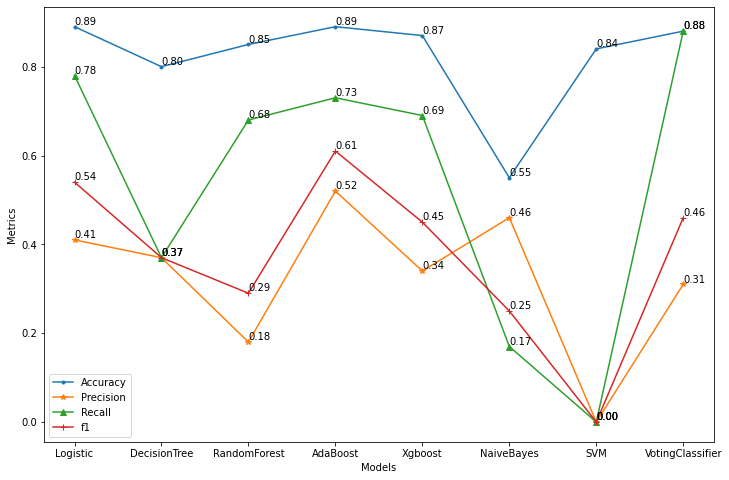

In [55]:
plt.subplots(figsize=(12,8))
plt.plot(compare.Models,compare.Accuracy,marker = '.')
plt.plot(compare.Models,compare.Precision,marker = '*')
plt.plot(compare.Models,compare.Recall,marker = '^')
plt.plot(compare.Models,compare.f1,marker = '+')
plt.legend(('Accuracy','Precision','Recall','f1'))

for x,y in zip(compare.Models,compare.Accuracy):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points",
                xytext=(0,2)) 
    
for x,y in zip(compare.Models,compare.Precision):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points",
                xytext=(0,2))

for x,y in zip(compare.Models,compare.Recall):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points",
                xytext=(0,2)) 

for x,y in zip(compare.Models,compare.f1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points",
                xytext=(0,2)) 


plt.xlabel('Models')
plt.ylabel('Metrics')
plt.show()

Heereby, We can infer that among all baseline models, Adaboost is performing well in terms of precision,recall and f1.
Next is logistic regression which is pretty close to Adaboost.

# Hyperparameter tuning using GridSearchCV


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [57]:
## HyperParameter Optimization

# Grid Search CV

grid = {'n_estimators':[50,100,150,200,300],'learning_rate':[0.1, 1, 1.1, 1.2, 1.3, 1.4]}

ada = AdaBoostClassifier()
cv = StratifiedKFold(n_splits=5,shuffle = True,random_state = 100)
scorer = make_scorer(f1_score)
from sklearn.model_selection import GridSearchCV

clf=GridSearchCV(estimator = ada, param_grid = grid, cv=cv, n_jobs=-1,scoring = scorer)
grid_result = clf.fit(df_train_x, df_train_y)

In [58]:
best_grid=clf.best_params_
best_grid

{'learning_rate': 1.4, 'n_estimators': 50}

In [59]:
clf.best_score_

0.5187161397535928

In [60]:
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.087820 (0.079853) with: {'learning_rate': 0.1, 'n_estimators': 50}
0.198123 (0.091895) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.225075 (0.071348) with: {'learning_rate': 0.1, 'n_estimators': 150}
0.312514 (0.112525) with: {'learning_rate': 0.1, 'n_estimators': 200}
0.357151 (0.120096) with: {'learning_rate': 0.1, 'n_estimators': 300}
0.476369 (0.078214) with: {'learning_rate': 1, 'n_estimators': 50}
0.467598 (0.097210) with: {'learning_rate': 1, 'n_estimators': 100}
0.475123 (0.071482) with: {'learning_rate': 1, 'n_estimators': 150}
0.469613 (0.082207) with: {'learning_rate': 1, 'n_estimators': 200}
0.474647 (0.069689) with: {'learning_rate': 1, 'n_estimators': 300}
0.447764 (0.062971) with: {'learning_rate': 1.1, 'n_estimators': 50}
0.474316 (0.100285) with: {'learning_rate': 1.1, 'n_estimators': 100}
0.482416 (0.083720) with: {'learning_rate': 1.1, 'n_estimators': 150}
0.487779 (0.104782) with: {'learning_rate': 1.1, 'n_estimators': 200}
0.470203 (0.076049) with: {'learn

In [61]:
# Stratified KFold Cross Validation
from sklearn.model_selection import StratifiedKFold
Kfolds = StratifiedKFold(n_splits=5,shuffle = True , random_state = 100)
i = 1
accuracy = []
f1_score_class1 = []
test_acc = []
test_f1 = []


for train_index,val_index in Kfolds.split(df_x, df_y):
    train_x , val_x = df_x.iloc[train_index], df_x.iloc[val_index]
    train_y , val_y = df_y.iloc[train_index], df_y.iloc[val_index]
    
    ad = AdaBoostClassifier(learning_rate= 1.4, n_estimators = 50)
    ad.fit(train_x, train_y)
    valid_pred = ad.predict(val_x) ; train_pred = ad.predict(train_x)
    test_pred = ad.predict(df_test_x)
    train_score = accuracy_score(train_pred,train_y)
    valid_score = accuracy_score(valid_pred,val_y) ; train_score = accuracy_score(train_pred, train_y)
    
    print("For CV = ",i)
    print(confusion_matrix(valid_pred,val_y))
    print("\nF1_Score:",f1_score(valid_pred,val_y))
    print("\nAccuracy for Validation:",valid_score,'||',"\tAccuracy for Train:",train_score)    
    print("\nClassification Report\n",classification_report(valid_pred,val_y))
    print("\n***************")
    i = i+1
    accuracy.append(valid_score) ; f1_score_class1.append(f1_score(valid_pred,val_y))
    test_acc.append(accuracy_score(test_pred,df_test_y)); test_f1.append(f1_score(test_pred,df_test_y))
    
print("Mean Accuracy",np.mean(accuracy),"\nMean F1_Score:",np.mean(f1_score_class1),"\nMean Test Accuracy",np.mean(test_acc)
     ,"\nMean Test F1score",np.mean(test_f1))

For CV =  1
[[227  27]
 [ 19  21]]

F1_Score: 0.4772727272727273

Accuracy for Validation: 0.8435374149659864 || 	Accuracy for Train: 0.8979591836734694

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       254
           1       0.44      0.53      0.48        40

    accuracy                           0.84       294
   macro avg       0.68      0.71      0.69       294
weighted avg       0.86      0.84      0.85       294


***************
For CV =  2
[[233  22]
 [ 13  26]]

F1_Score: 0.5977011494252873

Accuracy for Validation: 0.8809523809523809 || 	Accuracy for Train: 0.8962585034013606

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       255
           1       0.54      0.67      0.60        39

    accuracy                           0.88       294
   macro avg       0.74      0.79      0.76       294
weighted avg       0.89      0

In [62]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_bins,Distance_bins,Experiance_bins,Promotion_bins
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,1,6,4,0,5,Middle_Aged,VeryClose,SnAssociate,0_1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,3,3,10,7,1,7,Old,Far,SnAssociate,0_1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,3,0,0,0,0,Middle_Aged,VeryClose,SnAssociate,0_1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,8,7,3,0,Adults,Medium,SnAssociate,2_3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,3,2,2,2,2,Young,VeryClose,SnAssociate,2_3


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   object 
 14  JobSatis

In [64]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [65]:
df.loc[(df['JobRole'] == 'Sales Representative') & (df['Attrition'] == 1) ]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_bins,Distance_bins,Experiance_bins,Promotion_bins
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,4,3,5,3,0,3,Adults,Far,SnAssociate,0_1
33,39,1,Travel_Rarely,895,Sales,5,3,Technical Degree,4,Male,...,6,4,1,0,0,0,Middle_Aged,Medium,SnLead,0_1
36,50,1,Travel_Rarely,869,Sales,3,2,Marketing,1,Male,...,2,3,3,2,0,2,Old,Medium,Associate,0_1
127,19,1,Travel_Rarely,528,Sales,22,1,Marketing,4,Male,...,2,2,0,0,0,0,Young,VeryFar,NaN,0_1
171,19,1,Travel_Frequently,602,Sales,1,1,Technical Degree,3,Female,...,5,4,0,0,0,0,Young,VeryClose,Freshers,0_1
182,41,1,Travel_Rarely,1356,Sales,20,2,Marketing,2,Female,...,5,2,4,3,0,2,Middle_Aged,VeryFar,Associate,0_1
357,21,1,Travel_Frequently,756,Sales,1,1,Technical Degree,1,Female,...,3,3,3,2,1,2,Young,VeryClose,Associate,0_1
363,33,1,Travel_Rarely,350,Sales,5,3,Marketing,4,Female,...,2,3,1,0,0,0,Adults,Medium,Freshers,0_1
370,21,1,Travel_Rarely,156,Sales,12,3,Life Sciences,3,Female,...,0,3,1,0,0,0,Young,Far,Freshers,0_1
414,24,1,Travel_Rarely,1448,Sales,1,1,Technical Degree,1,Female,...,4,3,5,3,1,4,Young,VeryClose,SnAssociate,0_1


In [66]:
df2 = pd.DataFrame().assign(JobRole =df['JobRole'] , Attrition = df['Attrition'] )
df2

,JobRole,Attrition
0,Sales Executive,1
1,Research Scientist,0
2,Laboratory Technician,1
3,Research Scientist,0
4,Laboratory Technician,0
...,...,...
1465,Laboratory Technician,0
1466,Healthcare Representative,0
1467,Manufacturing Director,0
1468,Sales Executive,0


In [67]:
df3 = df2.loc[df2["Attrition"] == 1]

In [68]:
df3

,JobRole,Attrition
0,Sales Executive,1
2,Laboratory Technician,1
14,Laboratory Technician,1
21,Sales Representative,1
24,Research Scientist,1
...,...,...
1438,Sales Representative,1
1442,Research Scientist,1
1444,Laboratory Technician,1
1452,Sales Executive,1


In [69]:
df3['JobRole'].unique()

array(['Sales Executive', 'Laboratory Technician', 'Sales Representative',
       'Research Scientist', 'Research Director', 'Human Resources',
       'Healthcare Representative', 'Manufacturing Director', 'Manager'],
      dtype=object)

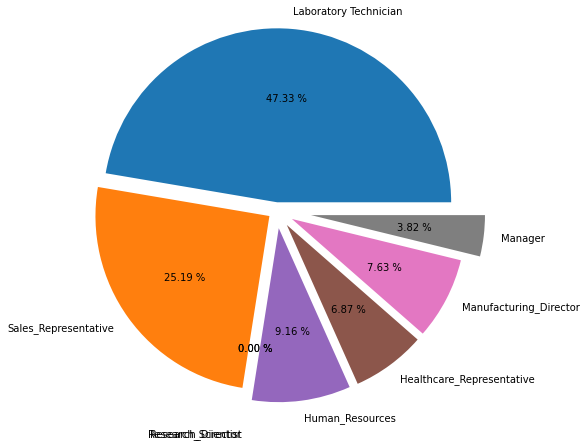

In [70]:
Laboratory  = df3.loc[df3['JobRole'] == "Laboratory Technician"].count()[0]
Sales_Representative = df3.loc[df3['JobRole'] == "Sales Representative"].count()[0]
Research_Scientist = df3.loc[df3['JobRole'] == "Research_Scientist"].count()[0]
Research_Director = df3.loc[df3['JobRole'] == "Research_Director"].count()[0]
Human_Resources = df3.loc[df3['JobRole'] == "Human Resources"].count()[0]
Healthcare_Representative = df3.loc[df3['JobRole'] == "Healthcare Representative"].count()[0]
Manufacturing_Director = df3.loc[df3['JobRole'] == "Manufacturing Director"].count()[0]
Manager = df3.loc[df3['JobRole'] == "Manager"].count()[0]

labels = [ 'Laboratory Technician', 'Sales_Representative' , 'Research_Scientist' ,'Research_Director', 'Human_Resources' , 'Healthcare_Representative' , 'Manufacturing_Director' , 'Manager']

explode = (0.1,0.1,0.4,0.4,0.2,0.2,0.2,0.4)
plt.pie([Laboratory,Sales_Representative,Research_Scientist, Research_Director,Human_Resources, Healthcare_Representative,Manufacturing_Director,Manager  ], labels = labels , autopct='%.2f %%', explode = explode, radius = 2)


plt.show()